In [ ]:
import numpy as np
import pandas as pd


In [ ]:
df=pd.read_csv('emotion_dataset_2.csv')
df.head()

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...


In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
Emotion,0
Text,0
Clean_Text,466


In [ ]:
df.shape

(34792, 4)

In [ ]:
df_new=df.dropna()
df_new.head()

,Unnamed: 0,Emotion,Text,Clean_Text
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...
5,5,fear,I'm expecting an extremely important phonecall...,Im expecting extremely important phonecall min...


In [ ]:
modified_df=df_new[['Emotion','Clean_Text']]
modified_df.head()

,Emotion,Clean_Text
1,joy,Sage Act upgrade list tommorow
2,sadness,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,joy,eye true hazel eyeand brilliant Regular feat...
4,joy,ugh babe hugggzzz u babe naamazed nga ako e...
5,fear,Im expecting extremely important phonecall min...


In [ ]:
modified_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34326 entries, 1 to 34791
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Emotion     34326 non-null  object
 1   Clean_Text  34326 non-null  object
dtypes: object(2)
memory usage: 804.5+ KB


In [ ]:
!pip install nltk

## Data Preprocessing

In [ ]:
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

modified_df['Clean_Text'] = modified_df['Clean_Text'].apply(preprocess)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
<ipython-input-14-495f9c330e20>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modified_df['Clean_Text'] = modified_df['Clean_Text'].apply(preprocess)


In [ ]:
modified_df.head()

,Emotion,Clean_Text
1,joy,sage act upgrade list tommorow
2,sadness,way homegirl baby funeral man hate funeral sho...
3,joy,eye true hazel eyeand brilliant regular featur...
4,joy,ugh babe hugggzzz u babe naamazed nga ako e ba...
5,fear,im expecting extremely important phonecall min...


In [ ]:
duplicates = modified_df[modified_df.duplicated()]
print(modified_df.shape)
print(duplicates)

(34326, 2)
       Emotion                                         Clean_Text
71         joy  life leopold truly happy hope prayer beloved s...
284    sadness  sad afforded welcome given beirut hostage told...
333       fear       afraid tomorrow seen yesterday love today le
553       fear       afraid tomorrow seen yesterday love today le
624    sadness      mccolgan slumped deep dejection said bad race
...        ...                                                ...
34750  neutral                                               john
34757      joy   young lord overjoyed beautiful wife friend found
34765  neutral                                               sure
34771  neutral                                                bad
34781     fear  tom shakeshaft 15 reveals dismay plan drive du...

[3827 rows x 2 columns]


In [ ]:
duplicates['Emotion'].value_counts()

,count
Emotion,
fear,1265
neutral,685
joy,659
sadness,594
anger,556
surprise,62
disgust,4
shame,2


In [ ]:
modified_df_new = modified_df.drop_duplicates()
print(modified_df_new.shape)

(30499, 2)


Emotion
joy         10378
disgust     10378
neutral     10378
shame       10378
sadness      6125
fear         4144
surprise     4000
anger        3730
Name: count, dtype: int64


<ipython-input-43-2550a22bcf5b>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=upsampled_df, x='Emotion', palette='Set2')


<Axes: xlabel='Emotion', ylabel='count'>

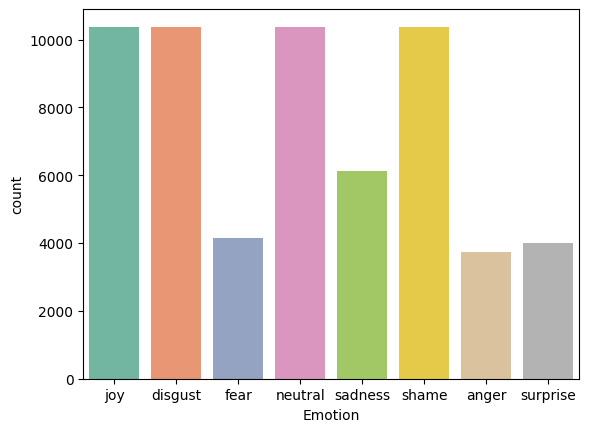

In [ ]:

import seaborn as sns
import pandas as pd
from sklearn.utils import resample

# Separate minority classes
joy_df = modified_df_new[modified_df_new['Emotion'] == 'joy']
sadness_df = modified_df_new[modified_df_new['Emotion'] == 'sadness']
fear_df = modified_df_new[modified_df_new['Emotion'] == 'fear']
surprise_df = modified_df_new[modified_df_new['Emotion'] == 'surprise']
anger_df = modified_df_new[modified_df_new['Emotion'] == 'anger']
shame_df = modified_df_new[modified_df_new['Emotion'] == 'shame']
neutral_df = modified_df_new[modified_df_new['Emotion'] == 'neutral']
disgust_df = modified_df_new[modified_df_new['Emotion'] == 'disgust']

# Upsample minority classes
shame_upsampled = resample(shame_df,
                                 replace=True,     # sample with replacement
                                 n_samples=round(modified_df_new['Emotion'].value_counts().max()) ,   # to match majority class
                                 random_state=123) # reproducible results

neutral_upsampled = resample(neutral_df,
                                 replace=True,     # sample with replacement
                                 n_samples=round(modified_df_new['Emotion'].value_counts().max()),    # to match majority class
                                 random_state=123) # reproducible results

disgust_upsampled = resample(disgust_df,
                                 replace=True,     # sample with replacement
                                 n_samples=round(modified_df_new['Emotion'].value_counts().max()),    # to match majority class
                                 random_state=123) # reproducible results

# Combine upsampled minority classes with the rest of the data
concatenated_df = pd.concat([joy_df,sadness_df,fear_df,surprise_df,anger_df,shame_upsampled, neutral_upsampled, disgust_upsampled])
upsampled_df = concatenated_df.sample(frac=1).reset_index(drop=True)
# Check the class distribution after upsampling
print(upsampled_df['Emotion'].value_counts())

sns.countplot(data=upsampled_df, x='Emotion', palette='Set2')


## EXPLORATORY DATA ANALYSIS


<ipython-input-44-38104fb9c67a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=modified_df,x='Emotion',palette='Set2')


<Axes: xlabel='Emotion', ylabel='count'>

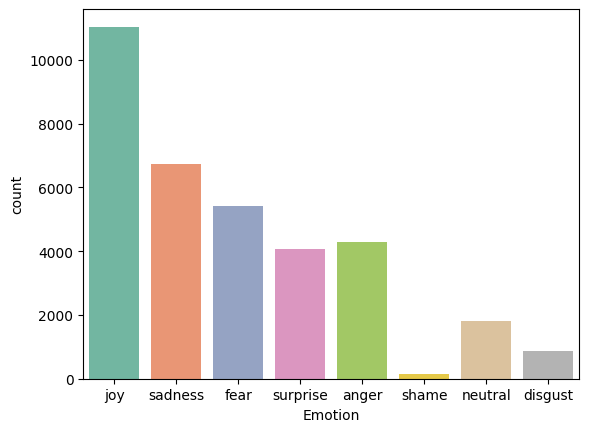

In [ ]:
import seaborn as sns

sns.countplot(data=modified_df,x='Emotion',palette='Set2')

### Getting the word count and length for texts

In [ ]:
upsampled_df['Length']=upsampled_df['Clean_Text'].str.len()
upsampled_df.head()

,Emotion,Clean_Text,Length
0,joy,position trackteam transtasman game eleven,42
1,disgust,new zealandborn peripatetic investor speaking ...,155
2,disgust,quot yu hot trot quot farmer smack day,38
3,joy,finished 72 vocab note card english exam essay...,58
4,fear,feel dreadful dreadful married colleague spent...,80


In [ ]:
## Word count in each review
def word_count(text):
    text=text.split()
    return len(text)
upsampled_df['word_count']=upsampled_df['Clean_Text'].apply(word_count)
upsampled_df.head()

,Emotion,Clean_Text,Length,word_count
0,joy,position trackteam transtasman game eleven,42,5
1,disgust,new zealandborn peripatetic investor speaking ...,155,18
2,disgust,quot yu hot trot quot farmer smack day,38,8
3,joy,finished 72 vocab note card english exam essay...,58,10
4,fear,feel dreadful dreadful married colleague spent...,80,11


In [ ]:
upsampled_df['mean_word_length'] = upsampled_df['Clean_Text'].map(lambda rev: np.mean([len(word) for word in rev.split()]))


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [ ]:
from nltk import tokenize
upsampled_df['mean_sentence_length']=upsampled_df['Clean_Text'].map(lambda rev:np.mean([len(sent) for sent in tokenize.sent_tokenize(rev)]))
upsampled_df.head()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


,Emotion,Clean_Text,Length,word_count,mean_word_length,mean_sentence_length
0,joy,position trackteam transtasman game eleven,42,5,7.600000,42.0
1,disgust,new zealandborn peripatetic investor speaking ...,155,18,7.666667,155.0
2,disgust,quot yu hot trot quot farmer smack day,38,8,3.875000,38.0
3,joy,finished 72 vocab note card english exam essay...,58,10,4.900000,58.0
4,fear,feel dreadful dreadful married colleague spent...,80,11,6.363636,80.0


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(ngram_range=(2,2))
bigram=cv.fit_transform(upsampled_df['Clean_Text'])
bigram

<59511x164696 sparse matrix of type '<class 'numpy.int64'>'
	with 364458 stored elements in Compressed Sparse Row format>

In [ ]:
count_values = bigram.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

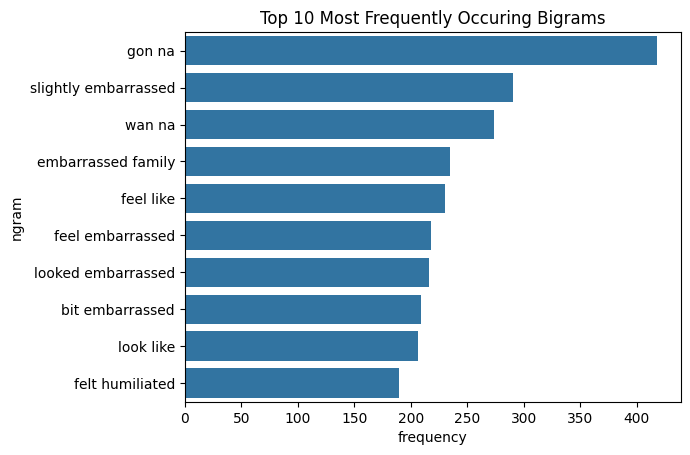

In [ ]:
import matplotlib.pyplot as plt
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Bigrams')
plt.show()

In [ ]:
import numpy as np
cv1 = CountVectorizer(ngram_range=(3,3))
trigrams = cv1.fit_transform(upsampled_df['Clean_Text'])
count_values = trigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv1.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]

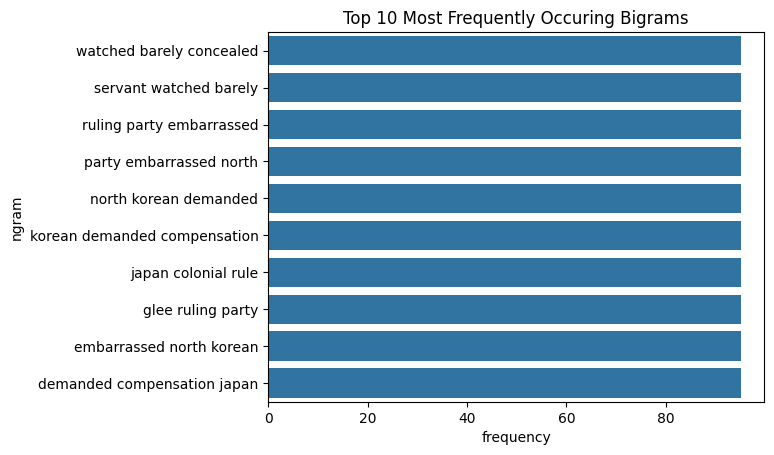

In [ ]:
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 Most Frequently Occuring Bigrams')
plt.show()

## MODEL TRAINING

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
upsampled_df['emotion_encoded'] = label_encoder.fit_transform(upsampled_df['Emotion'])

# Check how emotions are encoded
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))


{'anger': 0, 'disgust': 1, 'fear': 2, 'joy': 3, 'neutral': 4, 'sadness': 5, 'shame': 6, 'surprise': 7}


In [ ]:
upsampled_df.head()

,Emotion,Clean_Text,Length,word_count,mean_word_length,mean_sentence_length,emotion_encoded
0,joy,position trackteam transtasman game eleven,42,5,7.600000,42.0,3
1,disgust,new zealandborn peripatetic investor speaking ...,155,18,7.666667,155.0,1
2,disgust,quot yu hot trot quot farmer smack day,38,8,3.875000,38.0,1
3,joy,finished 72 vocab note card english exam essay...,58,10,4.900000,58.0,3
4,fear,feel dreadful dreadful married colleague spent...,80,11,6.363636,80.0,2


In [ ]:
from sklearn.model_selection import train_test_split

X = upsampled_df['Clean_Text']  # Text feature
y = upsampled_df['emotion_encoded']  # Target (emotion)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)  # Optional: Adjust max features
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression for multi-class classification
model = LogisticRegression(multi_class='multinomial', solver='newton-cg', max_iter=1200)
model.fit(X_train_tfidf, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1200, multi_class='multinomial', solver='newton-cg')

              precision    recall  f1-score   support

       anger       0.68      0.38      0.48      1159
     disgust       0.81      0.97      0.89      3046
        fear       0.70      0.47      0.56      1255
         joy       0.61      0.72      0.66      3106
     neutral       0.74      0.92      0.82      3137
     sadness       0.59      0.43      0.50      1826
       shame       1.00      1.00      1.00      3133
    surprise       0.64      0.37      0.47      1192

    accuracy                           0.75     17854
   macro avg       0.72      0.66      0.67     17854
weighted avg       0.75      0.75      0.74     17854

Accuracy: 0.7538366752548449


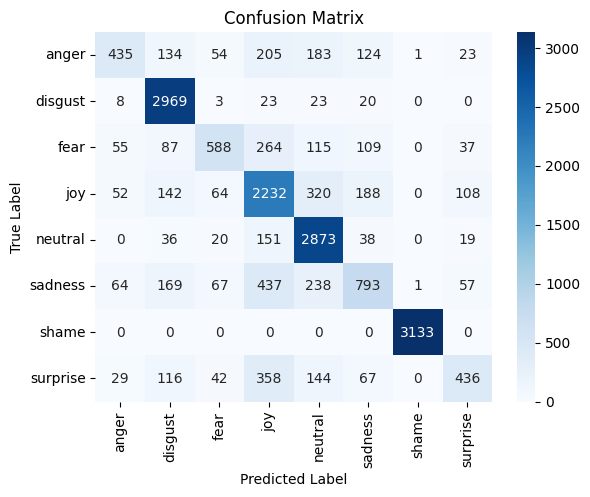

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions
y_pred = model.predict(X_test_tfidf)

# Classification report
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()


# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=300, random_state=42)

# Train the model
rf_model.fit(X_train_tfidf, y_train)


RandomForestClassifier(n_estimators=300, random_state=42)

In [ ]:
# Predict on test data
y_pred = rf_model.predict(X_test_tfidf)

# Evaluate the performance
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Accuracy: 0.768175198834995

Classification Report:

              precision    recall  f1-score   support

       anger       0.62      0.34      0.44      1159
     disgust       0.96      1.00      0.98      3046
        fear       0.73      0.40      0.52      1255
         joy       0.54      0.79      0.64      3106
     neutral       0.81      1.00      0.90      3137
     sadness       0.54      0.40      0.46      1826
       shame       1.00      1.00      1.00      3133
    surprise       0.65      0.29      0.40      1192

    accuracy                           0.77     17854
   macro avg       0.73      0.65      0.67     17854
weighted avg       0.77      0.77      0.75     17854



# **Naive Bayes**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
# Initialize the Multinomial Naive Bayes classifier
nb_model = MultinomialNB()

# Train the model
nb_model.fit(X_train_tfidf, y_train)


MultinomialNB()

In [ ]:
# Make predictions on the test data
y_pred = nb_model.predict(X_test_tfidf)

# Evaluate the performance
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.708636720062731

Classification Report:

              precision    recall  f1-score   support

           0       0.77      0.25      0.37      1159
           1       0.74      0.93      0.83      3046
           2       0.77      0.33      0.46      1255
           3       0.52      0.79      0.63      3106
           4       0.74      0.82      0.78      3137
           5       0.61      0.35      0.45      1826
           6       0.92      1.00      0.96      3133
           7       0.72      0.24      0.36      1192

    accuracy                           0.71     17854
   macro avg       0.72      0.59      0.60     17854
weighted avg       0.72      0.71      0.68     17854



# **Support Vector Machine**

In [ ]:
from sklearn import svm

In [ ]:
svm_model = svm.SVC(kernel='linear', random_state=42)

In [ ]:
svm_model.fit(X_train_tfidf, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
# Predict on the test set
y_pred = svm_model.predict(X_test_tfidf)

# Evaluate the model performance
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.7676711101153804

Classification Report:

              precision    recall  f1-score   support

           0       0.62      0.44      0.51      1159
           1       0.89      0.98      0.93      3046
           2       0.67      0.49      0.57      1255
           3       0.59      0.74      0.66      3106
           4       0.80      0.93      0.86      3137
           5       0.58      0.45      0.51      1826
           6       1.00      1.00      1.00      3133
           7       0.63      0.35      0.45      1192

    accuracy                           0.77     17854
   macro avg       0.72      0.67      0.69     17854
weighted avg       0.76      0.77      0.75     17854



In [ ]:
'''import pickle

with open('svm_model.pkl', 'wb') as file:
    pickle.dump(svm_model, file)'''

"import pickle\n\nwith open('svm_model.pkl', 'wb') as file:\n    pickle.dump(svm_model, file)"

In [ ]:
'''from google.colab import drive
drive.mount('/content/drive')

# Save the model to Google Drive
file_path = '/content/drive/My Drive/rf.pkl'
with open(file_path, 'wb') as file:
    pickle.dump(rf_model, file)'''

"from google.colab import drive\ndrive.mount('/content/drive')\n\n# Save the model to Google Drive\nfile_path = '/content/drive/My Drive/rf.pkl'\nwith open(file_path, 'wb') as file:\n    pickle.dump(rf_model, file)"

In [ ]:
import joblib
joblib.dump(vectorizer,'tfidf_vectorizer1.pkl')

['tfidf_vectorizer1.pkl']

In [ ]:
upsampled_df.head()

,Emotion,Clean_Text,Length,word_count,mean_word_length,mean_sentence_length,emotion_encoded
0,joy,position trackteam transtasman game eleven,42,5,7.600000,42.0,3
1,disgust,new zealandborn peripatetic investor speaking ...,155,18,7.666667,155.0,1
2,disgust,quot yu hot trot quot farmer smack day,38,8,3.875000,38.0,1
3,joy,finished 72 vocab note card english exam essay...,58,10,4.900000,58.0,3
4,fear,feel dreadful dreadful married colleague spent...,80,11,6.363636,80.0,2
